In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt

mini_train_data = pd.read_csv('data_CSV\mini_train_data.csv')
mini_test_data = pd.read_csv('data_CSV\mini_test_data.csv')

mini_data_x_train = mini_train_data[mini_train_data.columns[:-1]]
mini_data_y_train = mini_train_data[mini_train_data.columns[-1]]

mini_data_x_test = mini_test_data[mini_test_data.columns[:-1]]
mini_data_y_test = mini_test_data[mini_test_data.columns[-1]]


In [3]:
mini_normalize_X_train = normalize(mini_data_x_train)
mini_normalize_y_train = mini_data_y_train
mini_normalize_X_test = normalize(mini_data_x_test)
mini_normalize_y_test = mini_data_y_test

In [4]:
mini_scaled_X_train = StandardScaler().fit_transform(mini_data_x_train)
mini_scaled_y_train = mini_data_y_train
mini_scaled_X_test = StandardScaler().fit_transform(mini_data_x_test)
mini_scaled_y_test = mini_data_y_test

# logistic model

In [5]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logeistic_params = {
    "penalty": ['l1', 'l2'],
    "solver": ['newton-cg', 'lbfgs'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

llogistic_GridSearch = GridSearchCV(
    logistic,
    logeistic_params,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1
)

llogistic_GridSearch.fit(mini_normalize_X_train, mini_normalize_y_train)




Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [6]:
logistic_tunned = LogisticRegression(
    penalty=llogistic_GridSearch.best_estimator_.get_params()['penalty'],
    solver=llogistic_GridSearch.best_estimator_.get_params()['solver'],
    C=llogistic_GridSearch.best_estimator_.get_params()['C'])
    
print('Penalty choosed :',
            llogistic_GridSearch.best_estimator_.get_params()['penalty'])
print('Solver Choosed :',
            llogistic_GridSearch.best_estimator_.get_params()['solver'])
print('C value CHoosed:', llogistic_GridSearch.best_estimator_.get_params()['C'])

Penalty choosed : l2
Solver Choosed : newton-cg
C value CHoosed: 1000


# SVM


In [7]:
from sklearn.svm import SVC

SVM = SVC()

SVM_params = {
    # 'kernel': ['rbf', 'poly'],
    "C": [0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    # 'degree' :range(1, 5)

}

SVM_GridSearch = GridSearchCV(
    SVM,
    SVM_params,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=1
)

SVM_GridSearch.fit(mini_normalize_X_train, mini_normalize_y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             scoring='accuracy', verbose=1)

In [8]:
SVM_tunned = SVC(
    gamma=SVM_GridSearch.best_estimator_.get_params()['gamma'],
    C=SVM_GridSearch.best_estimator_.get_params()['C'])
    
print('gamma Choosed :',
            SVM_GridSearch.best_estimator_.get_params()['gamma'])
print('C value CHoosed:', SVM_GridSearch.best_estimator_.get_params()['C'])

gamma Choosed : 1
C value CHoosed: 10


# decsion tree


In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_classifer = DecisionTreeClassifier()

tree_param = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 5),
    "max_leaf_nodes": range(1, 10)
}

tree_grid = GridSearchCV(
    tree_classifer,
    param_grid=tree_param,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=False,
    scoring='accuracy'
)

tree_grid.fit(mini_normalize_X_train, mini_normalize_y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [ ]:
print('Best Criterion:', tree_grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree_grid.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:',
      tree_grid.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min_samples_split:',
      tree_grid.best_estimator_.get_params()['min_samples_split'])

tree_tunned = DecisionTreeClassifier(
    max_depth=tree_grid.best_estimator_.get_params()['max_depth'],
    criterion=tree_grid.best_estimator_.get_params()['criterion'],
    max_leaf_nodes=tree_grid.best_estimator_.get_params()['max_leaf_nodes'],
    min_samples_split=tree_grid.best_estimator_.get_params()['min_samples_split']
)


Best Criterion: gini
Best max_depth: 6
Best max_leaf_nodes: 9
Best min_samples_split: 2


# randomforest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(n_estimators=10)

RForest_param = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 5),
    "max_leaf_nodes": range(1, 10)
}

RForest_grid = GridSearchCV(
    RForest,
    param_grid=RForest_param,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=False,
    scoring='accuracy'
)

RForest_grid.fit(mini_normalize_X_train, mini_normalize_y_train)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy', verbose=1)

In [ ]:
print('choosen Criterion:',
      RForest_grid.best_estimator_.get_params()['criterion'])
print('choosen max_depth:',
      RForest_grid.best_estimator_.get_params()['max_depth'])
print('choosen max_leaf_nodes:',
      RForest_grid.best_estimator_.get_params()['max_leaf_nodes'])
print('choosen min_samples_split:',
      RForest_grid.best_estimator_.get_params()['min_samples_split'])

RForst_tunned = DecisionTreeClassifier(
    max_depth=RForest_grid.best_estimator_.get_params()['max_depth'],
    criterion=RForest_grid.best_estimator_.get_params()['criterion'],
    max_leaf_nodes=RForest_grid.best_estimator_.get_params()['max_leaf_nodes'],
    min_samples_split=RForest_grid.best_estimator_.get_params()[
        'min_samples_split']
)


choosen Criterion: entropy
choosen max_depth: 9
choosen max_leaf_nodes: 9
choosen min_samples_split: 4


# knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_dict_knn = {
    "n_neighbors": range(1, 15)
}


Knn_grid = GridSearchCV(
    knn,
    param_dict_knn,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1)

Knn_grid.fit(mini_scaled_X_train, mini_scaled_y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, scoring='accuracy',
             verbose=1)

In [ ]:
print('Best n_neighbors:',
      Knn_grid.best_estimator_.get_params()['n_neighbors'])

Knn_tunned = KNeighborsClassifier(
    n_neighbors=Knn_grid.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors: 1


## **just use grid search parameters to tune the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logistic_tunned = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1000
)

SVM_tunned = SVC(
    gamma=1,
    C=10
)

tree_tunned = DecisionTreeClassifier(
    max_depth=6,
    criterion='gini',
    max_leaf_nodes=9,
    min_samples_split=2
)

RForst_tunned = RandomForestClassifier(
    n_estimators=10,
    max_depth=9,
    criterion='entropy',
    max_leaf_nodes=9,
    min_samples_split=4
)

Knn_tunned = KNeighborsClassifier(
    n_neighbors=1
)


In [ ]:
Models = [logistic_tunned, SVM_tunned, tree_tunned, RForst_tunned, Knn_tunned]
Mode_names = ['Logistic Regression', 'SVM',
              'Descsion tree clf', 'Random forest', 'KNN']

              


In [ ]:
features_names = ['heart_rate', 'IMU_chest_accz_scale16', 'IMU_hand_accx_scale16',
                 'IMU_hand_magnetometerx', 'IMU_chest_magnetometerz',
                 'IMU_chest_accy_scale16', 'IMU_ankle_accx_scale16',
                 'IMU_chest_temperature', 'IMU_hand_accz_scale16',
                 'IMU_hand_magnetometery', 'IMU_ankle_magnetometerx',
                 'IMU_hand_temperature', 'IMU_ankle_magnetometerz',
                 'IMU_ankle_magnetometery', 'IMU_hand_magnetometerz',
                 'IMU_ankle_accy_scale16']

aciviatiy_names = ['lie','sit','iron','stand']


In [ ]:
from adspy_shared_utilities import plot_decision_tree, plot_feature_importances, plot_class_regions_for_classifier_subplot

# plot_decision_tree(tree_tunned,feature_names,aciviatiy_names)


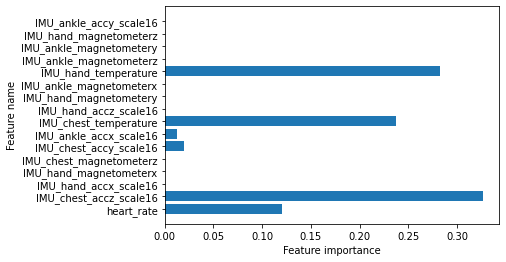

In [ ]:
plot_feature_importances(tree_tunned,features_names)

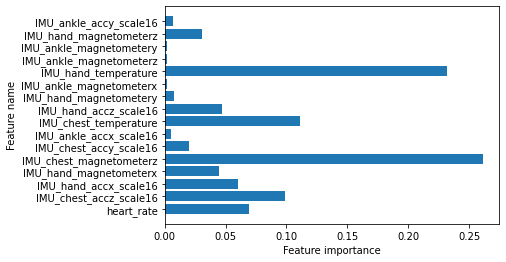

In [ ]:
plot_feature_importances(tree_tunned,features_names)

from sklearn.decomposition import PCA

mini_PCA_X_train = PCA(n_components=2).fit_transform(mini_data_x_train)
mini_PCA_X_test = PCA(n_components=2).fit_transform(mini_data_x_test)


mini_PCA_X_train_df = pd.DataFrame(mini_PCA_X_train, columns=['pca_feature1', 'pca_feature2'])
mini_PCA_y_train_df = mini_data_y_train

mini_PCA_X_test_df = pd.DataFrame(mini_PCA_X_test, columns=['pca_feature1', 'pca_feature2'])
mini_PCA_y_test_df = mini_data_y_test


frame1 = [mini_PCA_X_train_df, mini_PCA_X_test_df]
frame2 = [mini_PCA_y_train_df, mini_PCA_y_test_df]
PCA_X = result = pd.concat(frame1)
PCA_y = result = pd.concat(frame2)
